## 0. Dataframes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import seaborn as sns
import geopandas as gpd
from fuzzywuzzy import process # se usa para hacer match de strings

In [3]:
beneficiarios_df = pd.read_csv("../data/beneficiarios_sample_limpio.csv", encoding='latin1')
mle_2023_df = pd.read_csv("../data/export MLE 2023 limpio.csv", encoding='latin1')

In [4]:
beneficiarios_df

,MES_INFORMACION,CÓDIGO_BENEFICIARIO,SEXO,EDAD_TRAMO,TITULAR_CARGA,TRAMO_FONASA,TRAMO_RENTA,NACIONALIDAD,CARACTERIZACIÓN,TIPO_ASEGURADO,REGIÓN_BENEFICIARIO,COMUNA_BENEFICIARIO
0,202312,71819187,Hombre,40 a 49 años,Titular,D,650.001 - 700.000,Chilena,Dependiente,Trabajador Dependiente,Del Bíobío,Curanilahue
1,202312,80064014,Hombre,40 a 49 años,Titular,D,900.001 - 950.000,Chilena,Dependiente,Trabajador Dependiente,Del Bíobío,Concepción
2,202312,87503153,Mujer,50 a 59 años,Titular,A,Sin Cotizaciones,Chilena,Grupo Hogar Carente,Carente,De La Araucanía,Ercilla
3,202312,71657668,Mujer,40 a 49 años,Titular,A,Sin Cotizaciones,Chilena,Suf,Carente,De La Araucanía,Victoria
4,202312,75628648,Mujer,40 a 49 años,Titular,B,1 - 100.000,Chilena,Pensionado,Pensionado,De La Araucanía,Victoria
...,...,...,...,...,...,...,...,...,...,...,...,...
95,202312,68400895,Hombre,40 a 49 años,Titular,B,800.001 - 850.000,Chilena,Empleado Del Sector Salud,Trabajador Dependiente,Metropolitana De Santiago,Maipú
96,202312,86602758,Mujer,30 a 39 años,Titular,C,Sin Cotizaciones,Chilena,Dependiente,Trabajador Dependiente,Metropolitana De Santiago,Peñaflor
97,202312,76736354,Mujer,30 a 39 años,Titular,B,350.001 - 400.000,Chilena,Dependiente,Trabajador Dependiente,Metropolitana De Santiago,Estación Central
98,202312,69521217,Hombre,30 a 39 años,Titular,C,Sin Cotizaciones,Chilena,Dependiente,Trabajador Dependiente,Metropolitana De Santiago,Estación Central


In [5]:
mle_2023_df

,MES_EMISION,CODIGO_PRESTACIN,DESC_SECCION,DESC_ITEM,CODIGO_BENEFICIARIO,TRAMO_FONASA,EDAD_TRAMO,SEXO,REGION_EMISION,COMUNA_EMISION,PRESTRACIONES,MONTO_FAM,MONTO_COPAGO
0,202305,309022,Exmenes De Diagnstico,Laboratorio Clnico,97481406,D,35 a 39 aos,Mujer,Metropolitana De Santiago,La Cisterna,1,890,900
1,202305,302023,Exmenes De Diagnstico,Laboratorio Clnico,76712895,X,50 a 54 aos,Hombre,De Tarapac,Iquique,1,630,1390
2,202305,302023,Exmenes De Diagnstico,Laboratorio Clnico,69353764,B,50 a 54 aos,Mujer,Metropolitana De Santiago,San Joaqun,1,630,1390
3,202305,302023,Exmenes De Diagnstico,Laboratorio Clnico,76007327,B,55 a 59 aos,Mujer,Del Bobo,Curanilahue,1,630,1390
4,202305,302023,Exmenes De Diagnstico,Laboratorio Clnico,81474165,B,55 a 59 aos,Mujer,Metropolitana De Santiago,Las Condes,1,630,1390
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,202303,101001,Atencin Mdica,Consulta Mdica,81530409,D,25 a 29 aos,Mujer,Metropolitana De Santiago,Buin,1,6210,6750
796,202303,101001,Atencin Mdica,Consulta Mdica,81429362,D,25 a 29 aos,Mujer,Metropolitana De Santiago,Maip,1,6210,6750
797,202303,101001,Atencin Mdica,Consulta Mdica,74470827,D,25 a 29 aos,Mujer,Metropolitana De Santiago,Maip,1,6210,6750
798,202303,101001,Atencin Mdica,Consulta Mdica,78390065,C,25 a 29 aos,Mujer,Metropolitana De Santiago,Maip,1,6210,6750


## 1. ¿Qué tipos de prestación médica son más frecuentes entre diferentes tramos de edad y géneros?

## 2. ¿Cómo varía la cantidad y tipo de prestaciones emitidas según el mes del año? ¿Existen patrones estacionales?

## 3. ¿Qué tipos de prestación médica son más frecuentes en cada región?

**Aclaraciones**  

- Usaremos el archivo **Regional.shp** para graficar el mapa de Chile, con las regiones delimitadas.
  
- Utilizaremos la librería **fuzzywuzzy** (específicamente `from fuzzywuzzy import process`) para hacer coincidir los nombres de regiones en el DataFrame **mle_2023_df** con los nombres presentes en el shapefile **mapa**.


### Introduccion

La salud es un aspecto fundamental para cualquier sociedad, y entender cómo se distribuyen las prestaciones médicas en un país como Chile puede revelar patrones clave. Por ello, en este análisis buscamos identificar los tipos de prestaciones médicas más frecuentes en cada región. Para lograrlo, utilizamos un conjunto de datos que incluye información sobre prestaciones, regiones de emisión y su frecuencia de uso.

In [6]:
# Agrupar por región y tipo de prestación
prestacion_frecuente = mle_2023_df.groupby(['REGION_EMISION', 'DESC_SECCION']).size().reset_index(name='FRECUENCIA')

In [7]:
# Encontrar el tipo de prestación más frecuente en cada región
prestaciones_mas_frecuentes = prestacion_frecuente.loc[prestacion_frecuente.groupby('REGION_EMISION')['FRECUENCIA'].idxmax()]

In [8]:
prestaciones_mas_frecuentes

,REGION_EMISION,DESC_SECCION,FRECUENCIA
0,De Antofagasta,Atencin Mdica,27
2,De Arica Y Parinacota,Atencin Mdica,8
5,De Atacama,Atencin Mdica,7
7,De Coquimbo,Atencin Mdica,32
9,De La Araucana,Atencin Mdica,20
11,De Los Lagos,Atencin Mdica,14
14,De Los Ros,Atencin Mdica,8
16,De Magallanes Y De La Antrtica Chilena,Atencin Mdica,5
17,De Tarapac,Atencin Mdica,13
19,De Valparaso,Atencin Mdica,107


C:\Users\giuli\AppData\Local\Temp\ipykernel_12732\2672796814.py:2: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.barplot(data=prestaciones_mas_frecuentes, x='REGION_EMISION', y='FRECUENCIA', hue='DESC_SECCION', dodge=False, palette=sns.color_palette("hls", 8))


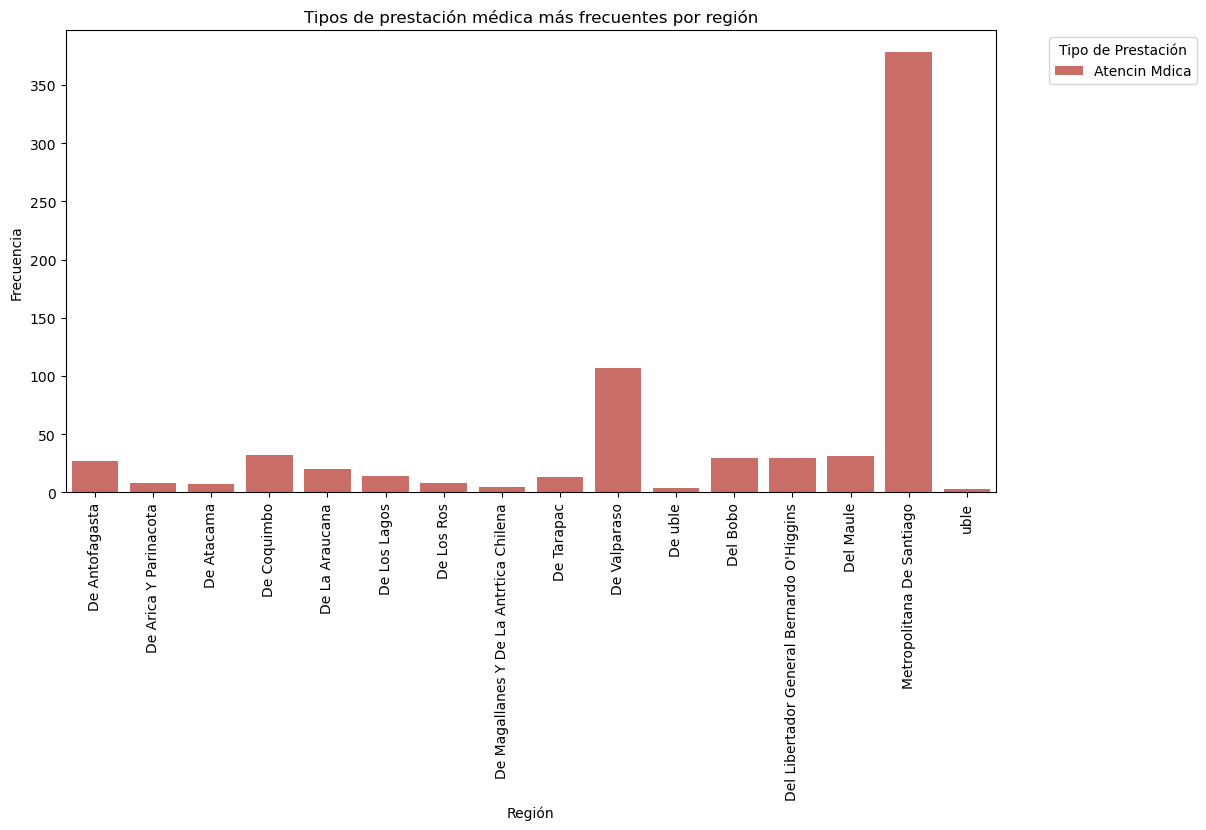

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(data=prestaciones_mas_frecuentes, x='REGION_EMISION', y='FRECUENCIA', hue='DESC_SECCION', dodge=False, palette=sns.color_palette("hls", 8))
plt.title('Tipos de prestación médica más frecuentes por región')
plt.xlabel('Región')
plt.ylabel('Frecuencia')
plt.legend(title='Tipo de Prestación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [10]:
# de usa este archivo para poder graficar el mapa de Chile por regiones
mapa = gpd.read_file("../data/Regiones/Regional.shp")
mapa

,objectid,cir_sena,codregion,area_km,st_area_sh,st_length_,Region,geometry
0,1084,1,15,16866.819844,1.886869e+10,7.505296e+05,Región de Arica y Parinacota,"POLYGON ((-7727277.278 -1997230.768, -7726464...."
1,1085,2,1,42284.567484,4.830637e+10,1.213713e+06,Región de Tarapacá,"MULTIPOLYGON (((-7810213.515 -2298008.280, -78..."
2,1086,3,2,126071.431981,1.508452e+11,2.516112e+06,Región de Antofagasta,"MULTIPOLYGON (((-7870470.961 -2985679.186, -78..."
3,1087,15,12,133053.142345,3.581316e+11,9.049830e+07,Región de Magallanes y Antártica Chilena,"MULTIPOLYGON (((-7494057.535 -7542535.383, -74..."
4,1088,14,11,106703.377369,2.242743e+11,4.144481e+07,Región de Aysén del Gral.Ibañez del Campo,"MULTIPOLYGON (((-8413517.696 -6234055.255, -84..."
5,1089,4,3,75661.248635,9.643906e+10,2.401741e+06,Región de Atacama,"MULTIPOLYGON (((-7932747.769 -3311218.615, -79..."
6,1090,5,4,40575.901682,5.498082e+10,2.065933e+06,Región de Coquimbo,"MULTIPOLYGON (((-7963268.900 -3784870.143, -79..."
7,1091,6,5,16322.970393,2.301475e+10,1.679609e+06,Región de Valparaíso,"MULTIPOLYGON (((-8991645.917 -3991821.789, -89..."
8,1092,7,13,15392.030737,2.225204e+10,1.064253e+06,Región Metropolitana de Santiago,"POLYGON ((-7873736.745 -3885505.642, -7873695...."
9,1093,13,10,48408.371357,8.771834e+10,7.874158e+06,Región de Los Lagos,"MULTIPOLYGON (((-8331768.181 -5403721.402, -83..."


<Figure size 1200x800 with 0 Axes>

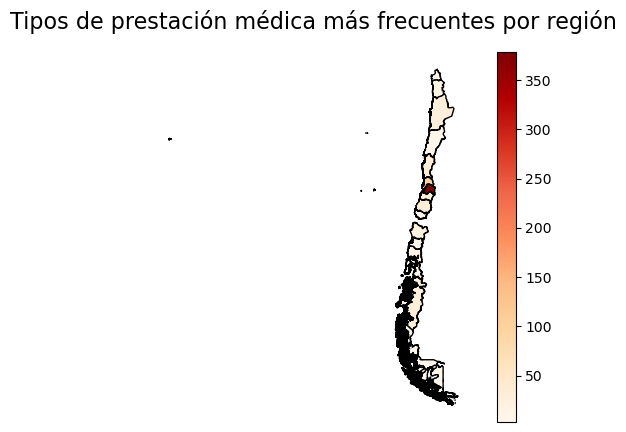

In [11]:
# Emparejar nombres similares
nombres_mapa = mapa['Region'].unique()
nombres_prestaciones = prestaciones_mas_frecuentes['REGION_EMISION'].unique()

# Crear un diccionario de coincidencias
matches = {nombre: process.extractOne(nombre, nombres_mapa)[0] for nombre in nombres_prestaciones}

# Reemplazar nombres en prestaciones_mas_frecuentes
prestaciones_mas_frecuentes['Region'] = prestaciones_mas_frecuentes['REGION_EMISION'].map(matches)

# Unir con el shapefile
mapa_regiones = mapa.merge(prestaciones_mas_frecuentes, on='Region', how='left')

# Graficar el mapa
plt.figure(figsize=(12, 8))
mapa_regiones.plot(column='FRECUENCIA', cmap='OrRd', legend=True, edgecolor='black')
plt.title('Tipos de prestación médica más frecuentes por región', fontsize=16)
plt.axis('off')
plt.show()

## 4. ¿Cómo se relacionan los distintos tramos de Fonasa con la frecuencia y el tipo de prestaciones recibidas?

In [12]:
mle_2023_df = mle_2023_df.rename(columns={'PRESTRACIONES': 'PRESTACIONES'})

In [13]:
# Calcular la frecuencia total de prestaciones por tramo Fonasa
cant_por_tramo = mle_2023_df.groupby("TRAMO_FONASA")["PRESTACIONES"].sum().reset_index()

cant_por_tramo.columns = ["Tramo Fonasa", "Total Prestaciones"]

print(cant_por_tramo)

  Tramo Fonasa  Total Prestaciones
0            B                 334
1            C                 144
2            D                 323
3            X                   3


In [14]:
# Agrupar por tramo y tipo de prestación (sección)
tipo_por_tramo = mle_2023_df.groupby(["TRAMO_FONASA", "DESC_SECCION"])["PRESTACIONES"].sum().reset_index()

# Sorteamos
tipo_por_tramo = tipo_por_tramo.sort_values(["TRAMO_FONASA", "PRESTACIONES"], ascending=[True, False])

tipo_por_tramo.head()

,TRAMO_FONASA,DESC_SECCION,PRESTACIONES
0,B,Atencin Mdica,303
1,B,Exmenes De Diagnstico,26
3,B,Proc. Apoyo Clnico Y Terap.,4
2,B,Otros Profesionales,1
4,C,Atencin Mdica,128


In [15]:
# Agrupar por tramo Fonasa y edad
distribucion_edad = beneficiarios_df.groupby(["TRAMO_FONASA", "EDAD_TRAMO"]).size().reset_index(name="Count")

distribucion_edad.head()

,TRAMO_FONASA,EDAD_TRAMO,Count
0,A,30 a 39 años,3
1,A,40 a 49 años,9
2,A,50 a 59 años,1
3,B,20 a 29 años,1
4,B,30 a 39 años,5


In [16]:
# Agrupar por tramo Fonasa y sexo
distribucion_genero = beneficiarios_df.groupby(["TRAMO_FONASA", "SEXO"]).size().reset_index(name="Count")

print(distribucion_genero)

  TRAMO_FONASA    SEXO  Count
0            A  Hombre      4
1            A   Mujer      9
2            B  Hombre      8
3            B   Mujer     22
4            C  Hombre     11
5            C   Mujer     12
6            D  Hombre     20
7            D   Mujer     14


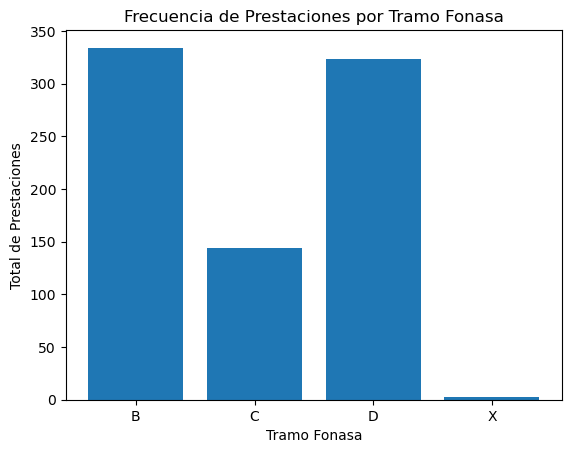

In [17]:
import matplotlib.pyplot as plt

plt.bar(cant_por_tramo["Tramo Fonasa"], cant_por_tramo["Total Prestaciones"])
plt.title("Frecuencia de Prestaciones por Tramo Fonasa")
plt.xlabel("Tramo Fonasa")
plt.ylabel("Total de Prestaciones")
plt.show()

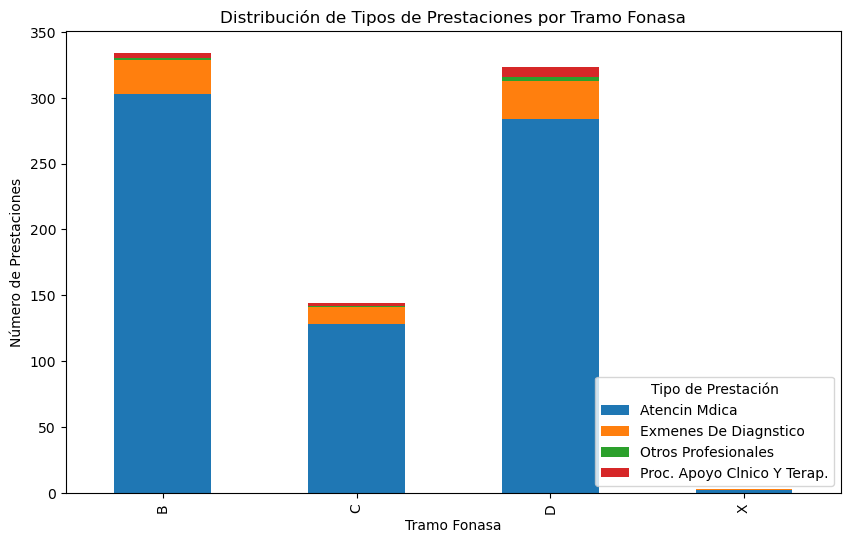

In [18]:
# Gráfico apilado para tipos de prestaciones por tramo
type_pivot = tipo_por_tramo.pivot(index="TRAMO_FONASA", columns="DESC_SECCION", values="PRESTACIONES")
type_pivot.plot(kind="bar", stacked=True, figsize=(10, 6))

plt.title("Distribución de Tipos de Prestaciones por Tramo Fonasa")
plt.xlabel("Tramo Fonasa")
plt.ylabel("Número de Prestaciones")
plt.legend(title="Tipo de Prestación")
plt.show()

In [19]:
# Calcular la frecuencia total de prestaciones por tramo Fonasa
cant_por_tramo = mle_2023_df.groupby("TRAMO_FONASA")["PRESTACIONES"].sum().reset_index()
cant_por_tramo.columns = ["Tramo Fonasa", "Total Prestaciones"]

tipo_por_tramo = mle_2023_df.groupby(["TRAMO_FONASA", "DESC_SECCION"])["PRESTACIONES"].sum().reset_index()

tipo_por_tramo = tipo_por_tramo.sort_values(["TRAMO_FONASA", "PRESTACIONES"], ascending=[True, False])

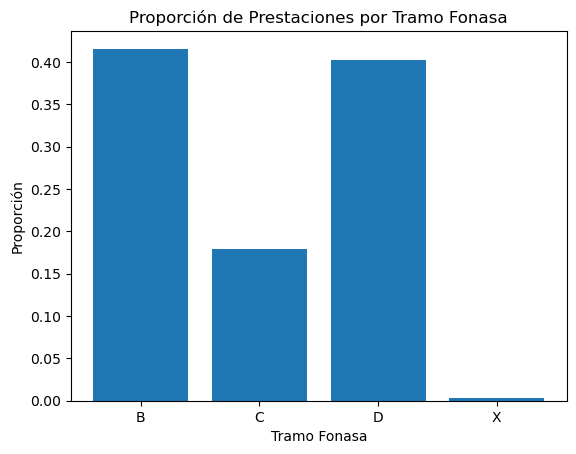

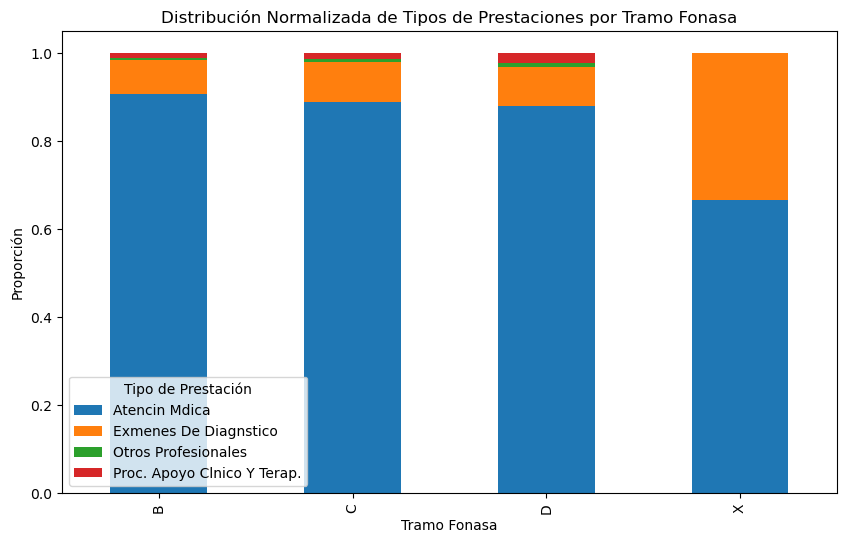

In [20]:
# Normalizar frecuencia total de prestaciones por tramo
cant_por_tramo["Proporción"] = cant_por_tramo["Total Prestaciones"] / cant_por_tramo["Total Prestaciones"].sum()

# Normalizar tipos de prestaciones por tramo
tipo_por_tramo["Proporción"] = tipo_por_tramo.groupby("TRAMO_FONASA")["PRESTACIONES"].transform(lambda x: x / x.sum())

plt.bar(cant_por_tramo["Tramo Fonasa"], cant_por_tramo["Proporción"])
plt.title("Proporción de Prestaciones por Tramo Fonasa")
plt.xlabel("Tramo Fonasa")
plt.ylabel("Proporción")
plt.show()

type_pivot_normalized = tipo_por_tramo.pivot(index="TRAMO_FONASA", columns="DESC_SECCION", values="Proporción")
type_pivot_normalized.plot(kind="bar", stacked=True, figsize=(10, 6))

plt.title("Distribución Normalizada de Tipos de Prestaciones por Tramo Fonasa")
plt.xlabel("Tramo Fonasa")
plt.ylabel("Proporción")
plt.legend(title="Tipo de Prestación")
plt.show()  

## 5. ¿Cómo cambia el gasto promedio en copagos a medida que los beneficiarios envejecen?